<a href="https://colab.research.google.com/github/KiranJoshi25/DataVizFall2020_Colab-/blob/master/Class_activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

New York times database for covid 19
Case study Bristol and Suffolk, MA


In [24]:
import pandas as pd 
import matplotlib.pyplot as plt



In [25]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe

In [26]:
df = pd.read_csv(db)
df.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [27]:
df.nunique()

date        236
county     1923
state        55
fips       3205
cases     16243
deaths     2400
dtype: int64

In [28]:
Bristol_fips = df[(df['county'] == 'Bristol') &(df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')



print("Bristol_fips = {}".format(Bristol_fips))



Suffolk_fips = df[(df['county'] == 'Suffolk') &(df['state'] == 'Massachusetts')]['fips'].unique()[0].astype('int')

print("Suffolk_fips = {}".format(Suffolk_fips))

Bristol_fips = 25005
Suffolk_fips = 25025


In [29]:
def get_county_stat(df,fips):
  Bristol_fips = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  Bristol_fips.set_index('date',inplace = True)
  Bristol_fips.index = pd.to_datetime(Bristol_fips.index)
  return Bristol_fips
get_county_stat(df,Bristol_fips).head()

,county,state,cases,deaths
date,,,,
2020-03-14,Bristol,Massachusetts,1,0
2020-03-15,Bristol,Massachusetts,1,0
2020-03-16,Bristol,Massachusetts,2,0
2020-03-17,Bristol,Massachusetts,5,0
2020-03-18,Bristol,Massachusetts,5,0


In [30]:
def get_county_stat(df,fips):
  Suffolk_fips = df[df['fips'] == fips][['date','county','state','cases','deaths']].copy()
  Suffolk_fips.set_index('date',inplace = True)
  Suffolk_fips.index = pd.to_datetime(Suffolk_fips.index)
  return Suffolk_fips
get_county_stat(df,Suffolk_fips).head()

,county,state,cases,deaths
date,,,,
2020-02-01,Suffolk,Massachusetts,1,0
2020-02-02,Suffolk,Massachusetts,1,0
2020-02-03,Suffolk,Massachusetts,1,0
2020-02-04,Suffolk,Massachusetts,1,0
2020-02-05,Suffolk,Massachusetts,1,0


Explore Data Type


In [20]:
df_Bristol = get_county_stat(df,25005)
df_Suffolk = get_county_stat(df,25025)

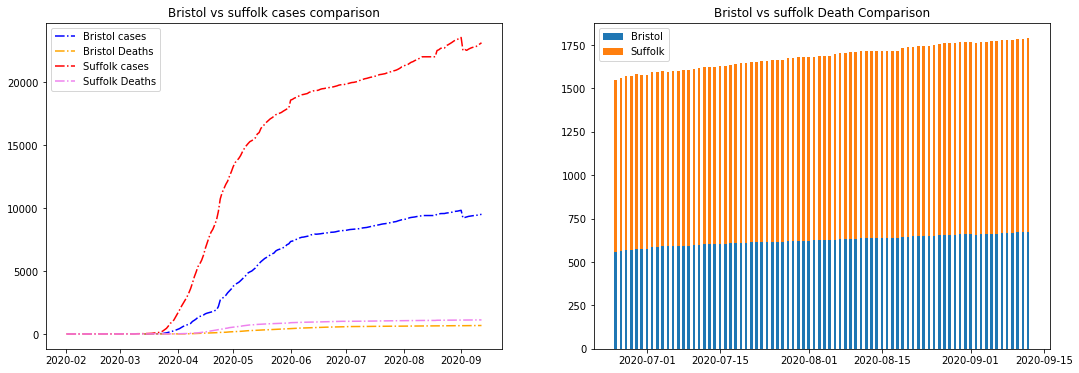

In [50]:

f,ax = plt.subplots(1,2,figsize=(18,6))
ax[0].plot(df_Bristol.index,df_Bristol.cases,'-.',color = 'blue', label = 'Bristol cases')
ax[0].plot(df_Bristol.index,df_Bristol.deaths,'-.',color = 'orange', label = 'Bristol Deaths')
ax[0].plot(df_Suffolk.index,df_Suffolk.cases,'-.',color = 'red', label = 'Suffolk cases')
ax[0].plot(df_Suffolk.index,df_Suffolk.deaths,'-.',color = 'violet', label = 'Suffolk Deaths')
width = 0.5
past = -80
stacked_bar1= ax[1].bar(df_Bristol.index[past:], df_Bristol.deaths[past:],width,label='Bristol')
stacked_bar2= ax[1].bar(df_Suffolk.index[past:], df_Suffolk.deaths[past:],width,bottom = df_Bristol.deaths[past:],label='Suffolk')
ax[0].set_title('Bristol vs suffolk cases comparison')
ax[1].set_title('Bristol vs suffolk Death Comparison')
ax[0].legend()
ax[1].legend()


In [75]:
Top_counties_by_cases = df.groupby(['fips']).max().sort_values(by=['cases'],ascending = False)
Top_counties_by_deaths = df.groupby(['fips']).max().sort_values(by=['deaths'],ascending = False)
Top_counties_by_cases.head(10)

,date,county,state,cases,deaths
fips,,,,,
6037.0,2020-09-12,Los Angeles,California,253176,6197
12086.0,2020-09-12,Miami-Dade,Florida,163789,2882
4013.0,2020-09-12,Maricopa,Arizona,137292,3158
17031.0,2020-09-12,Cook,Illinois,134352,5128
48201.0,2020-09-12,Harris,Texas,115149,2414
48113.0,2020-09-12,Dallas,Texas,78511,1043
12011.0,2020-09-12,Broward,Florida,74273,1279
32003.0,2020-09-12,Clark,Nevada,62402,1259
6065.0,2020-09-12,Riverside,California,55073,1103


In [76]:
Top_counties_by_deaths.head(10)

,date,county,state,cases,deaths
fips,,,,,
6037.0,2020-09-12,Los Angeles,California,253176,6197
17031.0,2020-09-12,Cook,Illinois,134352,5128
4013.0,2020-09-12,Maricopa,Arizona,137292,3158
26163.0,2020-09-12,Wayne,Michigan,33276,2943
12086.0,2020-09-12,Miami-Dade,Florida,163789,2882
36059.0,2020-09-12,Nassau,New York,45633,2706
48201.0,2020-09-12,Harris,Texas,115149,2414
34013.0,2020-09-12,Essex,New Jersey,20862,2123
25017.0,2020-09-12,Middlesex,Massachusetts,27732,2102


In [77]:
import folium 
import json 


In [78]:
def Folium_Choropleth(type,date_str):

SyntaxError: ignored